# ML Pipeline

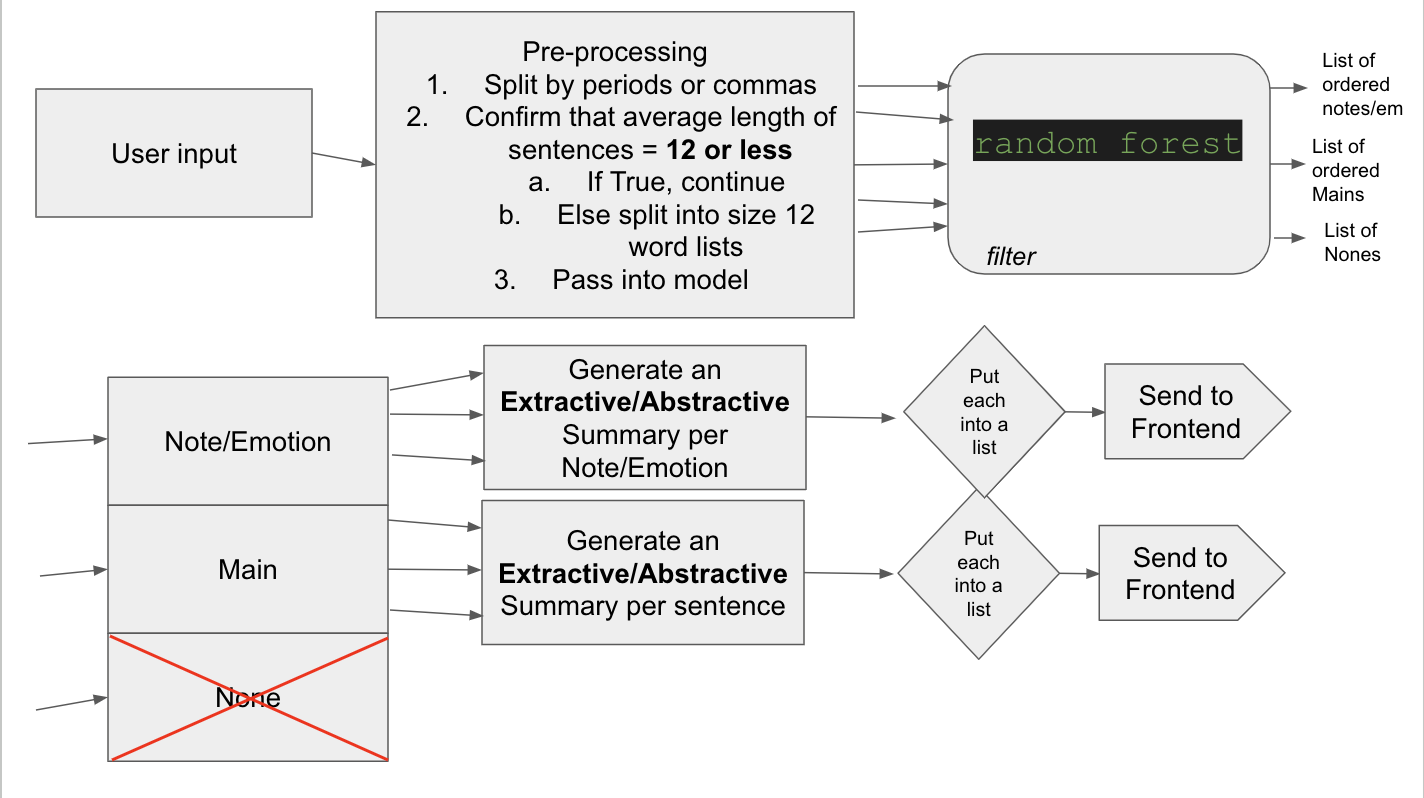

### Load in the data & clean it

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Reddit-Classification.csv')

df.head()

,Unnamed: 0,Sentences,Most Frequent NER,Class
0,1,"Ive had tinnitus for 4 years, and it developed...",SYM,note
1,2,I had a lot of fullness and loud ringing in my...,SOUND,note
2,3,The ringing was only loud for maybe a month or...,SOUND,note
3,4,"Ive had a few ear infections since then, and i...",NaN,none
4,5,"Fast forward to last week, I went and visited ...",NaN,none


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization: Split text into words
    words = word_tokenize(text.lower())
    # Remove punctuation and numbers
    words = [word for word in words if word.isalpha()]
    # Remove stopwords (common words that don't carry much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization: Reduce words to their base or dictionary form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words
df['Sentences'] = df['Sentences'].apply(lambda x: preprocess_text(x))
print(df['Sentences'][0])

['ive', 'tinnitus', 'year', 'developed', 'really', 'bad', 'ear', 'infection', 'developed', 'sinus', 'infection']


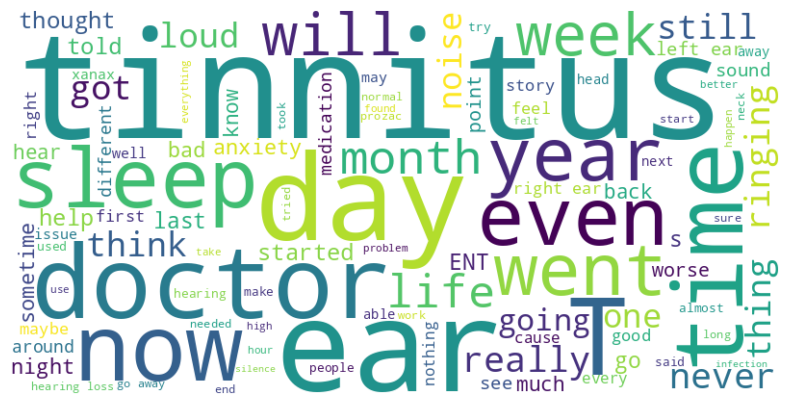

In [ ]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(sentences))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

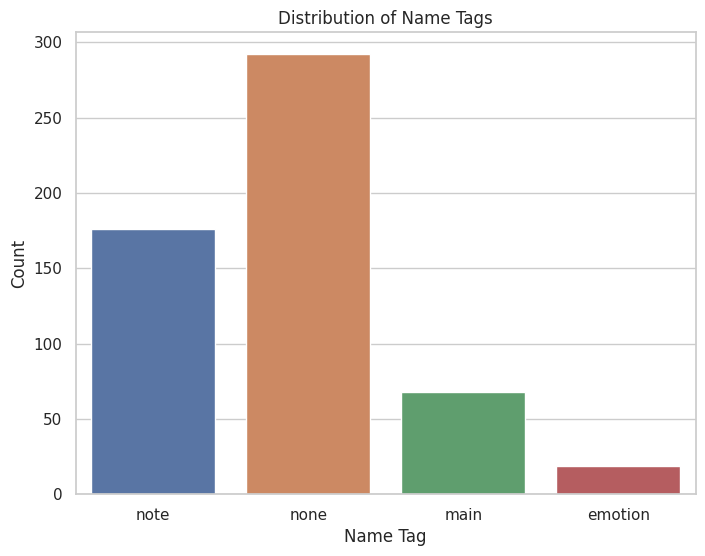

In [ ]:
#Histogram of Name Tags
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=df)
plt.xlabel("Name Tag")
plt.ylabel("Count")
plt.title("Distribution of Name Tags")
plt.show()

In [ ]:
df['Sentences'] = df['Sentences'].apply(' '.join)

### Synthetic Data Generation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE

name_tags = df['Class']
sentences = df['Sentences']
tfidf_vectorizer = TfidfVectorizer()
count_v = CountVectorizer()
sentence_vectors = tfidf_vectorizer.fit_transform(sentences)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, name_tags, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<ipython-input-60-214339824c42>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')


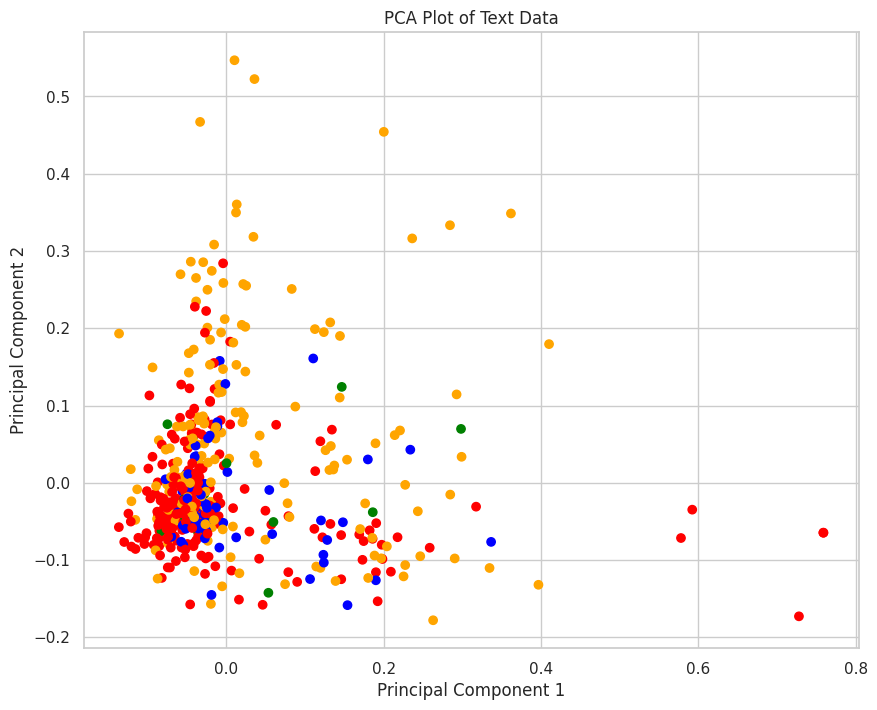

In [ ]:
#Principal Component Analysis (PCA) Plot:
from sklearn.decomposition import PCA
import numpy as np

# Create a color mapping dictionary
color_mapping = {'main': 'blue', 'note': 'orange', 'emotion': 'green', 'none': 'red'}

# Map 'Name Tag' values to colors
name_tag_colors = [color_mapping[tag] for tag in name_tags]

# Perform PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(sentence_vectors.toarray())

# Create the PCA plot with colors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')
plt.title("PCA Plot of Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


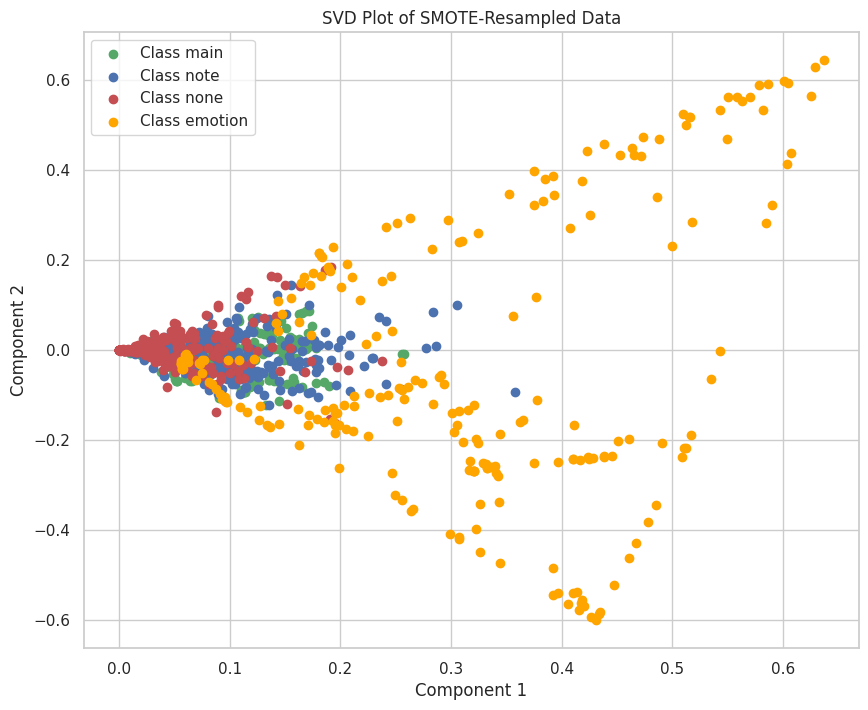

In [ ]:
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Step 2: Perform Truncated SVD on the resampled training data
svd = TruncatedSVD(n_components=2)  # You can specify the number of components you want to keep
reduced_features = svd.fit_transform(X_train_resampled)

# Step 3: Create a scatter plot with colors for class labels
plt.figure(figsize=(10, 8))
classes = list(set(y_train_resampled))
colors = ['g', 'b', 'r', 'orange', 'm', 'y', 'k']  # You may need to extend this list for more classes

for i, cls in enumerate(classes):
    plt.scatter(reduced_features[y_train_resampled == cls, 0], reduced_features[y_train_resampled == cls, 1], label=f'Class {cls}', color=colors[i])

plt.title("SVD Plot of SMOTE-Resampled Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()


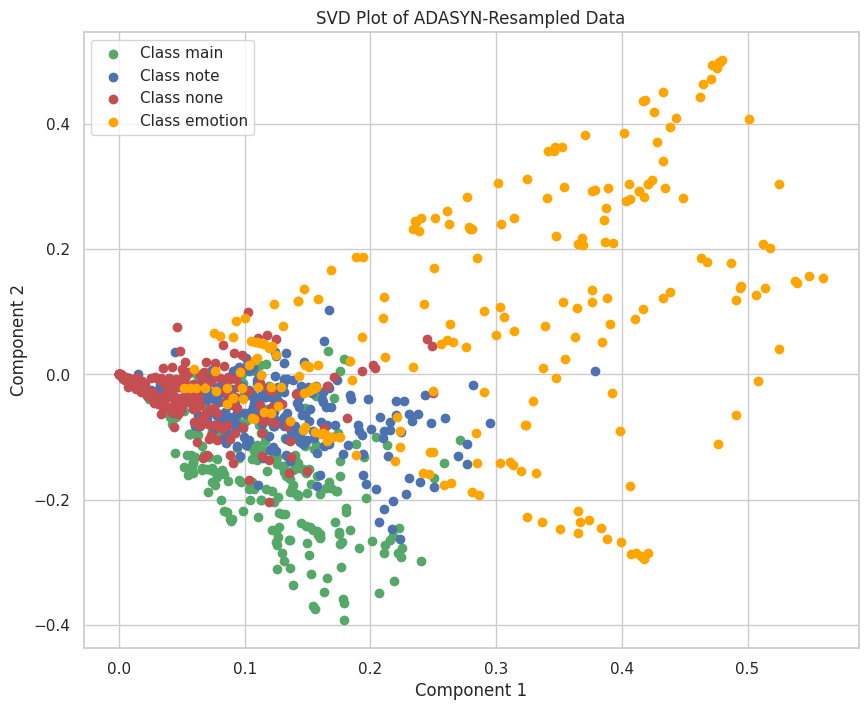

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Step 1: Apply ADASYN to your training data (X_train, y_train)
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Step 2: Perform Truncated SVD on the ADASYN-resampled training data
svd = TruncatedSVD(n_components=2)  # You can specify the number of components you want to keep
reduced_features_adasyn = svd.fit_transform(X_train_resampled_adasyn)

# Step 3: Create a scatter plot with colors for class labels
plt.figure(figsize=(10, 8))
classes = list(set(y_train_resampled_adasyn))
colors = ['g', 'b', 'r', 'orange']  # You may need to extend this list for more classes

for i, cls in enumerate(classes):
    plt.scatter(reduced_features_adasyn[y_train_resampled_adasyn == cls, 0], reduced_features_adasyn[y_train_resampled_adasyn == cls, 1], label=f'Class {cls}', color=colors[i])

plt.title("SVD Plot of ADASYN-Resampled Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()


### Random Forest Classifier

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import joblib

# Initialize and train the Random Forest model
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_log_loss = log_loss(y_test, rf_model.predict_proba(X_test))

print("Random Forest Metrics with Tuning:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")
print(f"Log Loss: {rf_log_loss}")

# Save the model and the vectorizer
with open('model.pkl', 'wb') as model_file:
    joblib.dump({'model': rf_model, 'vectorizer': tfidf_vectorizer}, model_file)

Random Forest Metrics with Tuning:
Accuracy: 0.7117117117117117
Precision: 0.7272493272493273
Recall: 0.7117117117117117
F1-Score: 0.701594633682919
Log Loss: 0.9444657494416452


### Load in the Models:

In [ ]:
import joblib

# Load the model and vectorizer
with open('/content/model.pkl', 'rb') as model_file:
    model_data = joblib.load(model_file)

#This is performed in the code below
# model = model_data['model']
# vectorizer = model_data['vectorizer']

In [ ]:
!pip install bert-extractive-summarizer

### User Input to Classify

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from google.colab import output
# from summarizer import Summarizer

# Create a mapping from tag numbers to categories
tag_to_category = {
    0: 'uncategorized',
    1: 'main',
    2: 'note_emotion',
}

# Function to split text into sentences
def split_text_into_sentences(text):
    sentences = re.split(r'[.,;!?]', text)
    sentences = [s.strip() for s in sentences if len(s) > 0]

    # Calculate the average sentence length
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    average_length = sum(sentence_lengths) / len(sentence_lengths)

    if average_length >= 12:
        # Split long sentences into segments of 6 words or less
        segmented_sentences = []
        for sentence in sentences:
            words = sentence.split()
            while words:
                segment = " ".join(words[:6])
                segmented_sentences.append(segment)
                words = words[6:]

        sentences = segmented_sentences

    if len(sentences) == 0:
        return "Please type at least 6 words"

    return sentences


# Categorize sentences based on trained model
def categorize_sentences(vectorized_sentences):
    #load model
    clf = model_data['model']
    predicted_tags = clf.predict(vectorized_sentences)
    return predicted_tags

def vectorize(all_sentences):
  vctrzr = model_data['vectorizer']
  x = vctrzr.transform(all_sentences)
  return x


############# MAIN ###########################

# Get user input
user_input = "ive had tinnitus for 4 years, and it developed after a really bad ear infection that developed because of a sinus infection. I had a lot of fullness and loud ringing in my left ear. Ive had a few ear infections since then, and it would get loud again but that only really happened during 2019. Fast forward to last week, I went and visited my brother in Texas. The flight there I had no problems And my ringing never worsened but a day after I got there I got a really bad cold and I was coughing up a storm and blowing my nose." #@param {type:"string"}

# Split user input into sentences
user_sentences = split_text_into_sentences(user_input)

x = vectorize(user_sentences)

# Categorize user input sentences
user_tags = categorize_sentences(vectorized_sentences=x)
print(user_tags)
# Separate sentences into 'note/emotion' and 'main' categories
# note_emotion_sentences = [user_sentences[i] for i in range(len(user_sentences)) if user_tags[i] == 'Note/Emotion']
# main_sentences = [user_sentences[i] for i in range(len(user_sentences)) if user_tags[i] == 'Main']

# Output categorized sentences
# print()
# print("Note/Emotion Sentences:")
# for sentence in note_emotion_sentences:
#     print(sentence)

# print()

# print("Main Sentences:")
# for sentence in main_sentences:
#     print(sentence)



print()
##############BERT for summarizing ###################
#from transformers import BertTokenizer, BertModel
# import torch

# # Load a pre-trained BERT model and tokenizer
# bert = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained(bert)
# bert_model = BertModel.from_pretrained(bert)

# # Tokenize and obtain embeddings
# input_ids = tokenizer.encode(main_sentences, return_tensors="pt", add_special_tokens=True)
# outputs = bert_model(input_ids)
# embeddings = outputs.last_hidden_state

# # Calculate sentence importance scores
# sentence_scores = torch.mean(embeddings, dim=1).squeeze()

# # Rank sentences based on scores
# sorted_indices = torch.argsort(sentence_scores, descending=True)
# print(input_ids[1])
# # Select the top-ranked sentences as the summary
# num_sentences = 1
# #summary = [tokenizer.decode(input_ids[sorted_indices[i]]) for i in range(num_sentences)]
# summary = tokenizer.decode(input_ids[1])
# print("Summary:")
# print(summary)


['note' 'none' 'none' 'note' 'none' 'note' 'none' 'none' 'none' 'none'
 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none'
 'none']

